# Signate_434

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame, Series

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score

import lightgbm as lgb
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

import IPython
def display(*dfs, head=True):
    for df in dfs:
        IPython.display.display(df.head() if head else df)

C:\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
train = pd.read_csv("train.csv", index_col=0)
test = pd.read_csv("test.csv", index_col=0)
sample_submit = pd.read_csv("sample_submission.csv", index_col=0, header= None)
df_train = train.copy()
df_test = test.copy()

In [3]:
print("train",train.shape)
print("train",train.columns)
print("test",test.shape)
print("test",test.columns)

train (1000, 13)
train Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time', 'target'],
      dtype='object')
test (1000, 12)
test Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time'],
      dtype='object')


In [4]:
train.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,target
id,,,,,,,,,,,,,
0,56,1,5882,0,38,0,185315.0104,0.844417,134,1,0,10,1
3,50,0,1767,1,35,0,371620.3666,0.837448,136,0,0,187,1
7,41,0,250,1,30,0,372810.2084,0.819996,139,1,0,29,1
11,47,0,582,1,20,0,185780.6482,0.870314,137,0,0,43,0
12,60,0,80,0,25,0,265096.3999,0.828112,136,1,0,213,0


In [5]:
train.target.value_counts()

0    802
1    198
Name: target, dtype: int64

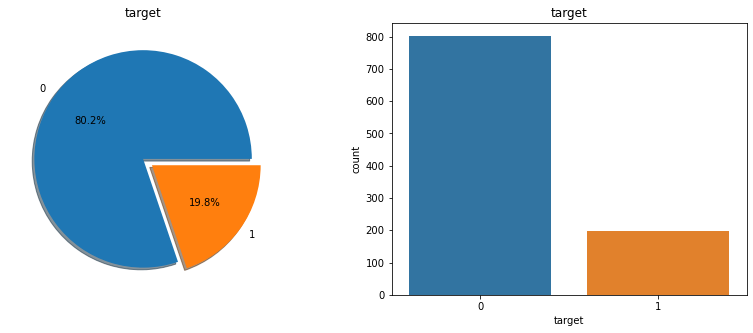

In [6]:
f,ax=plt.subplots(1,2,figsize=(14,5))
train.target.value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('target')
ax[0].set_ylabel('')
sns.countplot('target',data=train,ax=ax[1])
ax[1].set_title('target')
plt.show()

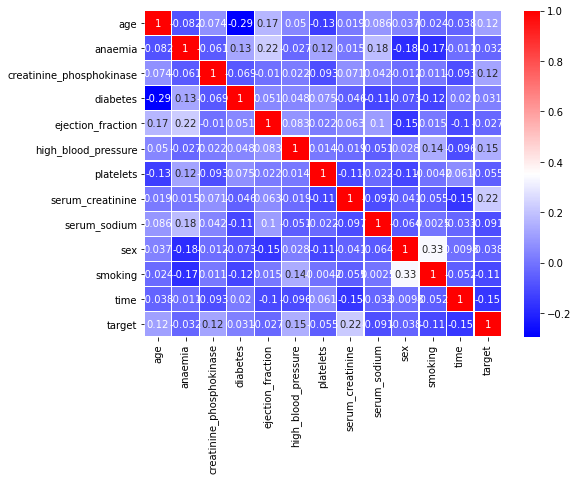

In [7]:
sns.heatmap(train.corr(),annot=True,cmap="bwr",linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()

In [8]:
train.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,target
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,57.632000,0.41600,605.359000,0.270000,36.691000,0.237000,278330.242337,1.030258,136.841000,0.755000,0.25600,149.560000,0.198000
std,9.875328,0.49314,971.937382,0.444182,11.037089,0.425455,79543.675235,0.704616,3.405777,0.430302,0.43664,77.381072,0.398692
min,39.000000,0.00000,23.000000,0.000000,14.000000,0.000000,138173.134500,0.629178,116.000000,0.000000,0.00000,4.000000,0.000000
25%,50.000000,0.00000,93.000000,0.000000,30.000000,0.000000,256629.434900,0.798218,135.000000,1.000000,0.00000,84.500000,0.000000
50%,58.000000,0.00000,255.000000,0.000000,35.000000,0.000000,267025.054700,0.844389,136.500000,1.000000,0.00000,185.000000,0.000000
75%,61.000000,1.00000,582.000000,1.000000,40.000000,0.000000,279943.418975,0.956294,139.000000,1.000000,1.00000,213.000000,0.000000
max,85.000000,1.00000,7861.000000,1.000000,70.000000,1.000000,824131.916700,8.994597,146.000000,1.000000,1.00000,285.000000,1.000000


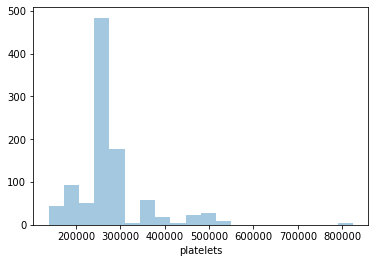

In [9]:
sns.distplot(train["platelets"], bins=20, kde=False, rug=False)
plt.show()

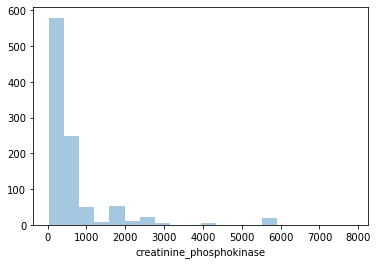

In [10]:
sns.distplot(train["creatinine_phosphokinase"], bins=20, kde=False, rug=False)
plt.show()

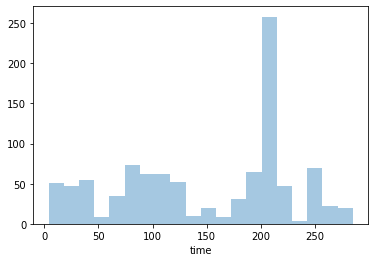

In [11]:
sns.distplot(train["time"], bins=20, kde=False, rug=False)
plt.show()

In [12]:
df_train.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,target
id,,,,,,,,,,,,,
0,56,1,5882,0,38,0,185315.0104,0.844417,134,1,0,10,1
3,50,0,1767,1,35,0,371620.3666,0.837448,136,0,0,187,1
7,41,0,250,1,30,0,372810.2084,0.819996,139,1,0,29,1
11,47,0,582,1,20,0,185780.6482,0.870314,137,0,0,43,0
12,60,0,80,0,25,0,265096.3999,0.828112,136,1,0,213,0


In [13]:
df_test.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
id,,,,,,,,,,,,
1,67,1,56,0,60,0,255844.0310,0.824480,140,0,0,147
2,58,0,320,0,38,0,163434.8513,5.281481,134,0,0,207
4,67,1,737,0,60,0,255278.8436,0.841388,140,0,0,113
5,48,0,231,1,60,0,500149.7955,0.742807,139,1,1,215
6,59,0,320,0,35,0,245489.2530,1.082861,132,1,0,215


In [14]:
sc = StandardScaler()
X = df_train.iloc[:,:-1].values
y = df_train.iloc[:,-1].values
X_test = df_test.iloc[:,:].values
X = sc.fit_transform(X)
X_test = sc.fit_transform(X_test)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=0)


In [15]:
X = df_train.iloc[:,:-1].values
y = df_train.iloc[:,-1].values
X_test = df_test.iloc[:,:].values

X = sc.fit_transform(X)
X_test = sc.fit_transform(X_test)

In [16]:
params = {
            "force_col_wise":True,
            'task': 'train',      # タスクを訓練に設定
            'boosting_type': 'gbdt',      # GBDTを指定
            "n_estimators":50000,
            'objective': 'binary',    
            'metric': {'binary_logloss'},
            "min_data_in_leaf":1,
            "max_depth":-1}
kn = 5
skf = StratifiedKFold(n_splits=kn, shuffle=True, random_state=1)
predict_proba = np.zeros(len(X_test)).astype(np.float64)
scores = []

for train_idx, valid_idx in skf.split(X, y):
    X_train, X_valid = X[train_idx], X[valid_idx]
    y_train, y_valid = y[train_idx], y[valid_idx]
    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_valid = lgb.Dataset(X_valid, y_valid, reference=lgb_train)
    lgb_results = {}
    gbm = lgb.train(
                    params,
                    lgb_train,
                    valid_sets=[lgb_train, lgb_valid],
                    num_boost_round=100,
                    verbose_eval=20,
                    early_stopping_rounds=10,
                    evals_result=lgb_results)
    y_gbm = gbm.predict(X_valid, num_iteration=gbm.best_iteration)
    scores.append(log_loss(y_valid, y_gbm))
    predict_proba += gbm.predict(X_test, num_iteration=gbm.best_iteration)
predict_proba = predict_proba / kn
skf_predict = [0 if i < 0.5 else 1 for i in predict_proba]

[LightGBM] [Info] Number of positive: 158, number of negative: 642
[LightGBM] [Info] Total Bins 749
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.197500 -> initscore=-1.401993
[LightGBM] [Info] Start training from score -1.401993
Training until validation scores don't improve for 10 rounds
[20]	training's binary_logloss: 0.143891	valid_1's binary_logloss: 0.409709
Early stopping, best iteration is:
[23]	training's binary_logloss: 0.126607	valid_1's binary_logloss: 0.404901
[LightGBM] [Info] Number of positive: 158, number of negative: 642
[LightGBM] [Info] Total Bins 752
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.197500 -> initscore=-1.401993
[LightGBM] [Info] Start training from score -1.401993
Training until validation scores don't improve for 10 rounds
[20]	training's binary_logloss: 0.148081	

<AxesSubplot:title={'center':'Metric during training'}, xlabel='Iterations', ylabel='binary_logloss'>

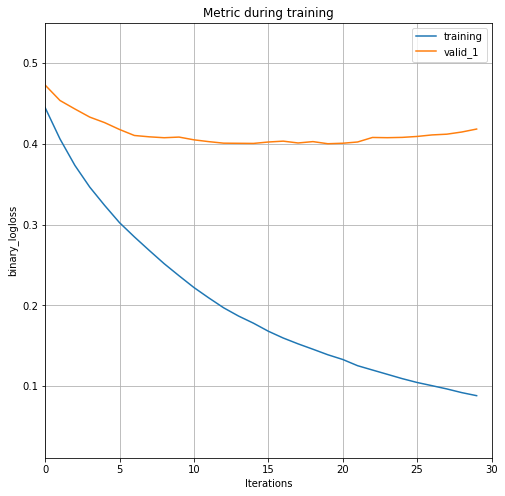

In [17]:
lgb.plot_metric(lgb_results, metric="binary_logloss", figsize=(8,8))

In [18]:
sample_submit[1] = skf_predict
sample_submit.to_csv("submit.csv", header=None, sep=",")
print(sample_submit.value_counts())
sample_submit.head()

1
0    909
1     91
dtype: int64


,1
0,
1,0
2,0
4,0
5,0
6,0
